# Time Series Forecast

### FRED Data - Advance Retail Sales: Clothing and Clothing Accessory Stores

U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, December 28, 2022.

In [2]:
import pandas as pd
import numpy as np

In [10]:
# Load SARIMAX forecasting tool
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Decomposition
from pmdarima import auto_arima                              # for determining ARIMA orders

# Load model evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv('RSCCASN.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

371
            RSCCASN
DATE               
1992-01-01     6938
1992-02-01     7524
1992-03-01     8475
1992-04-01     9401
1992-05-01     9558


### Plotting the Existing Data

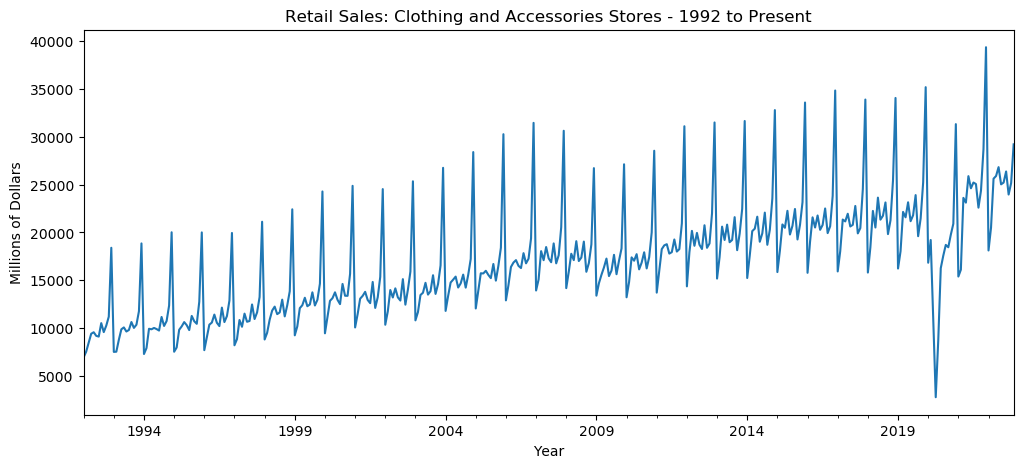

In [14]:
title='Retail Sales: Clothing and Accessories Stores - 1992 to Present'
ylabel='Millions of Dollars'
xlabel='Year'

ax = df['RSCCASN'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### Running an ETS Decomposition

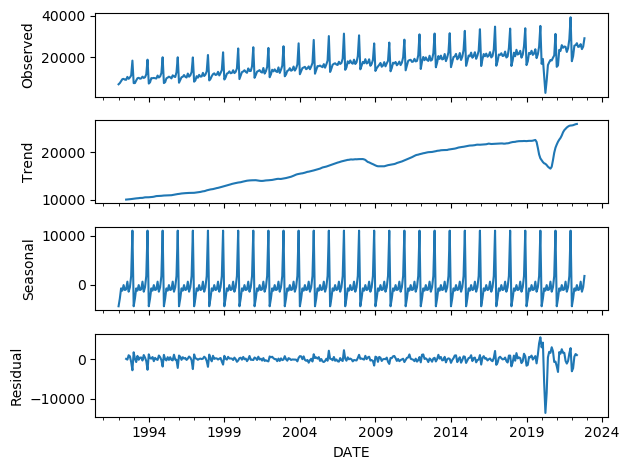

In [15]:
result = seasonal_decompose(df['RSCCASN'],model='add')
result.plot();

### Running auto_arima to obtain recommended orders for SARIMA model

In [16]:
auto_arima(df['RSCCASN'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  371
Model:             SARIMAX(0, 1, 3)x(1, 0, 0, 12)   Log Likelihood               -3298.901
Date:                            Wed, 28 Dec 2022   AIC                           6609.803
Time:                                    17:44:52   BIC                           6633.284
Sample:                                         0   HQIC                          6619.130
                                            - 371                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -104.5398     48.217     -2.168      0.030    -199.044     -10.036
ma.L1          0.0413      0.019      2.167      0.030       0.004       0.079
ma.L2         -0.2684      0.042     -6.389      0.000      -0.351      -0.186
ma.L3         -0.2286      0.035     -6.577      0.000      -0.297      -0.160
ar.S.L12       0.9669      0.013     73.535      0.000       0.941       0.993
sigma2      2.757e+06   5.78e+04     47.699      0.000    2.64e+06    2.87e+06
===================================================================================
Ljung-Box (Q):                       66.48   Jarque-Bera (JB):             26177.11
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               2.56   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                        44.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Splitting the data into train and test sets

In [17]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

### Fit SARIMA(0, 1, 3)x(1, 0, 0, 12) to the training set

In [18]:
model = SARIMAX(train['RSCCASN'],order=(0,1,3),seasonal_order=(1,0,0,12))
results = model.fit()
results.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.43819D+00    |proj g|=  1.43198D-01

At iterate    5    f=  9.35942D+00    |proj g|=  2.20390D-02

At iterate   10    f=  9.35474D+00    |proj g|=  1.18683D-03


 This problem is unconstrained.



At iterate   15    f=  9.35443D+00    |proj g|=  1.93037D-04

At iterate   20    f=  9.35404D+00    |proj g|=  3.59664D-03

At iterate   25    f=  9.16884D+00    |proj g|=  9.23154D-02
  ys=-1.423E+01  -gs= 1.632E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     40      1     1     0   9.232D-02   9.169D+00
  F =   9.1688377885618095     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                            RSCCASN   No. Observations:                  359
Model:             SARIMAX(0, 1, 3)x(1, 0, 0, 12)   Log Likelihood               -3291.613
Date:                            Wed, 28 Dec 2022   AIC                           6593.226
Time:                                    17:49:22   BIC                           6612.628
Sample:                                01-01-1992   HQIC                          6600.942
                                     - 11-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5840      0.018     33.226      0.000       0.550       0.618
ma.L2         -0.7015      0.016    -42.850      0.000      -0.734      -0.669
ma.L3         -0.8825      0.013    -66.735      0.000      -0.908      -0.857
ar.S.L12       0.9987      0.001   1145.464      0.000       0.997       1.000
sigma2      5.623e+06   2.69e-09   2.09e+15      0.000    5.62e+06    5.62e+06
===================================================================================
Ljung-Box (Q):                      359.74   Jarque-Bera (JB):               849.68
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.65e+29. Standard errors may be unstable.
"""

### Get the predicted values

In [19]:
start = len(train)
end = len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(0, 1, 3)(1, 0, 0, 12) Predictions')

### Plot predicted values against the test data

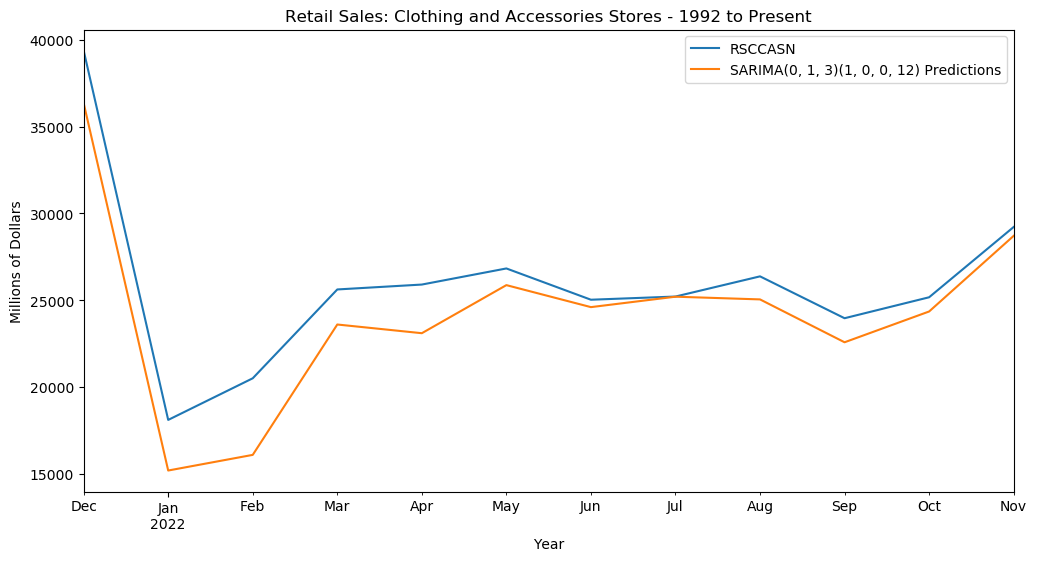

In [20]:
title='Retail Sales: Clothing and Accessories Stores - 1992 to Present'
ylabel='Millions of Dollars'
xlabel='Year'

ax = test['RSCCASN'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [21]:
error1 = mean_squared_error(test['RSCCASN'], predictions)
error2 = rmse(test['RSCCASN'], predictions)
print(f'SARIMA(0,1,0)(2,0,0,12) MSE Error: {error1:11.10}')
print(f'SARIMA(0,1,0)(2,0,0,12) RMSE Error: {error2:11.10}')

SARIMA(0,1,0)(2,0,0,12) MSE Error: 4558415.147
SARIMA(0,1,0)(2,0,0,12) RMSE Error: 2135.044531


### Retrain the model on full data and reforecast 12 months into the future

In [22]:
model = SARIMAX(df['RSCCASN'],order=(0,1,3),seasonal_order=(1,0,0,12))
results = model.fit()
fcast = results.predict(len(df),len(df)+11,typ='levels').rename('SARIMA(0,1,3)(1,0,0,12) Forecast')

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.44952D+00    |proj g|=  1.51836D-01

At iterate    5    f=  9.37076D+00    |proj g|=  2.48228D-02

At iterate   10    f=  9.36288D+00    |proj g|=  1.38042D-03

At iterate   15    f=  9.36239D+00    |proj g|=  3.59578D-03

At iterate   20    f=  9.36228D+00    |proj g|=  1.04505D-03

At iterate   25    f=  9.36048D+00    |proj g|=  1.77765D-02

At iterate   30    f=  9.27933D+00    |proj g|=  1.56786D-01

At iterate   35    f=  8.97659D+00    |proj g|=  1.40488D-01

At iterate   40    f=  8.91537D+00    |proj g|=  4.62458D-03

At iterate   45    f=  8.90056D+00    |proj g|=  1.46742D-01

At iterate   50    f=  8.88230D+00    |proj g|=  8.27564D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

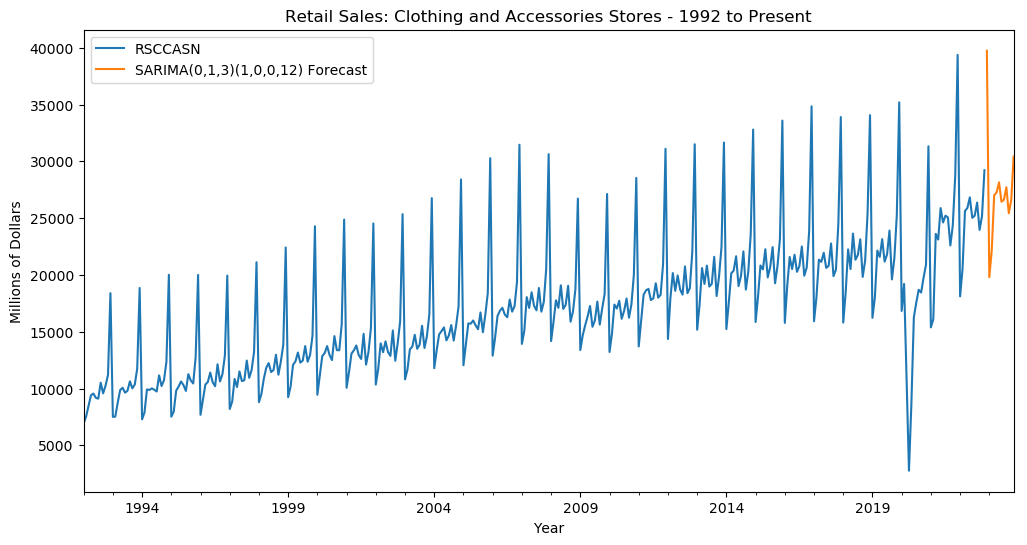

In [23]:
title='Retail Sales: Clothing and Accessories Stores - 1992 to Present'
ylabel='Millions of Dollars'
xlabel='Year'

ax = df['RSCCASN'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);